In [ ]:
!pip install transformers[sentencepiece] datasets sacrebleu rouge_score py7zr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 90.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.5 MB/s eta 0:00:

In [ ]:
from transformers import pipeline, set_seed

import matplotlib.pyplot as plt

import pandas as pd
from datasets import load_dataset, load_metric
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

import pandas as pd
import numpy as np

import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## [The CNN/DailyMail Dataset](https://huggingface.co/datasets/cnn_dailymail)

Extractive Summarization: the extractive approach selects the most important phrases and lines from the documents. It then combines all the important lines to create the summary. So, in this case, every line and word of the summary actually belongs to the original document which is summarized.

Abstractive Summarization: The abstractive approach uses new phrases and terms that are different from the original document, keeping the meaning the same, just like how humans do in summarization. So, it is much harder than the extractive approach.

In [ ]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", version="3.0.0")

print(f"Features in cnn_dailymail : {dataset['train'].column_names}")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/cnn_dailymail/default/3.0.0/1b3c71476f6d152c31c1730e83ccb08bcf23e348233f4fcc11e182248e6bf7de. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Features in cnn_dailymail : ['article', 'highlights', 'id']


## Image Recognition

In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (4,767 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [ ]:
import pytesseract as tess
from PIL import Image

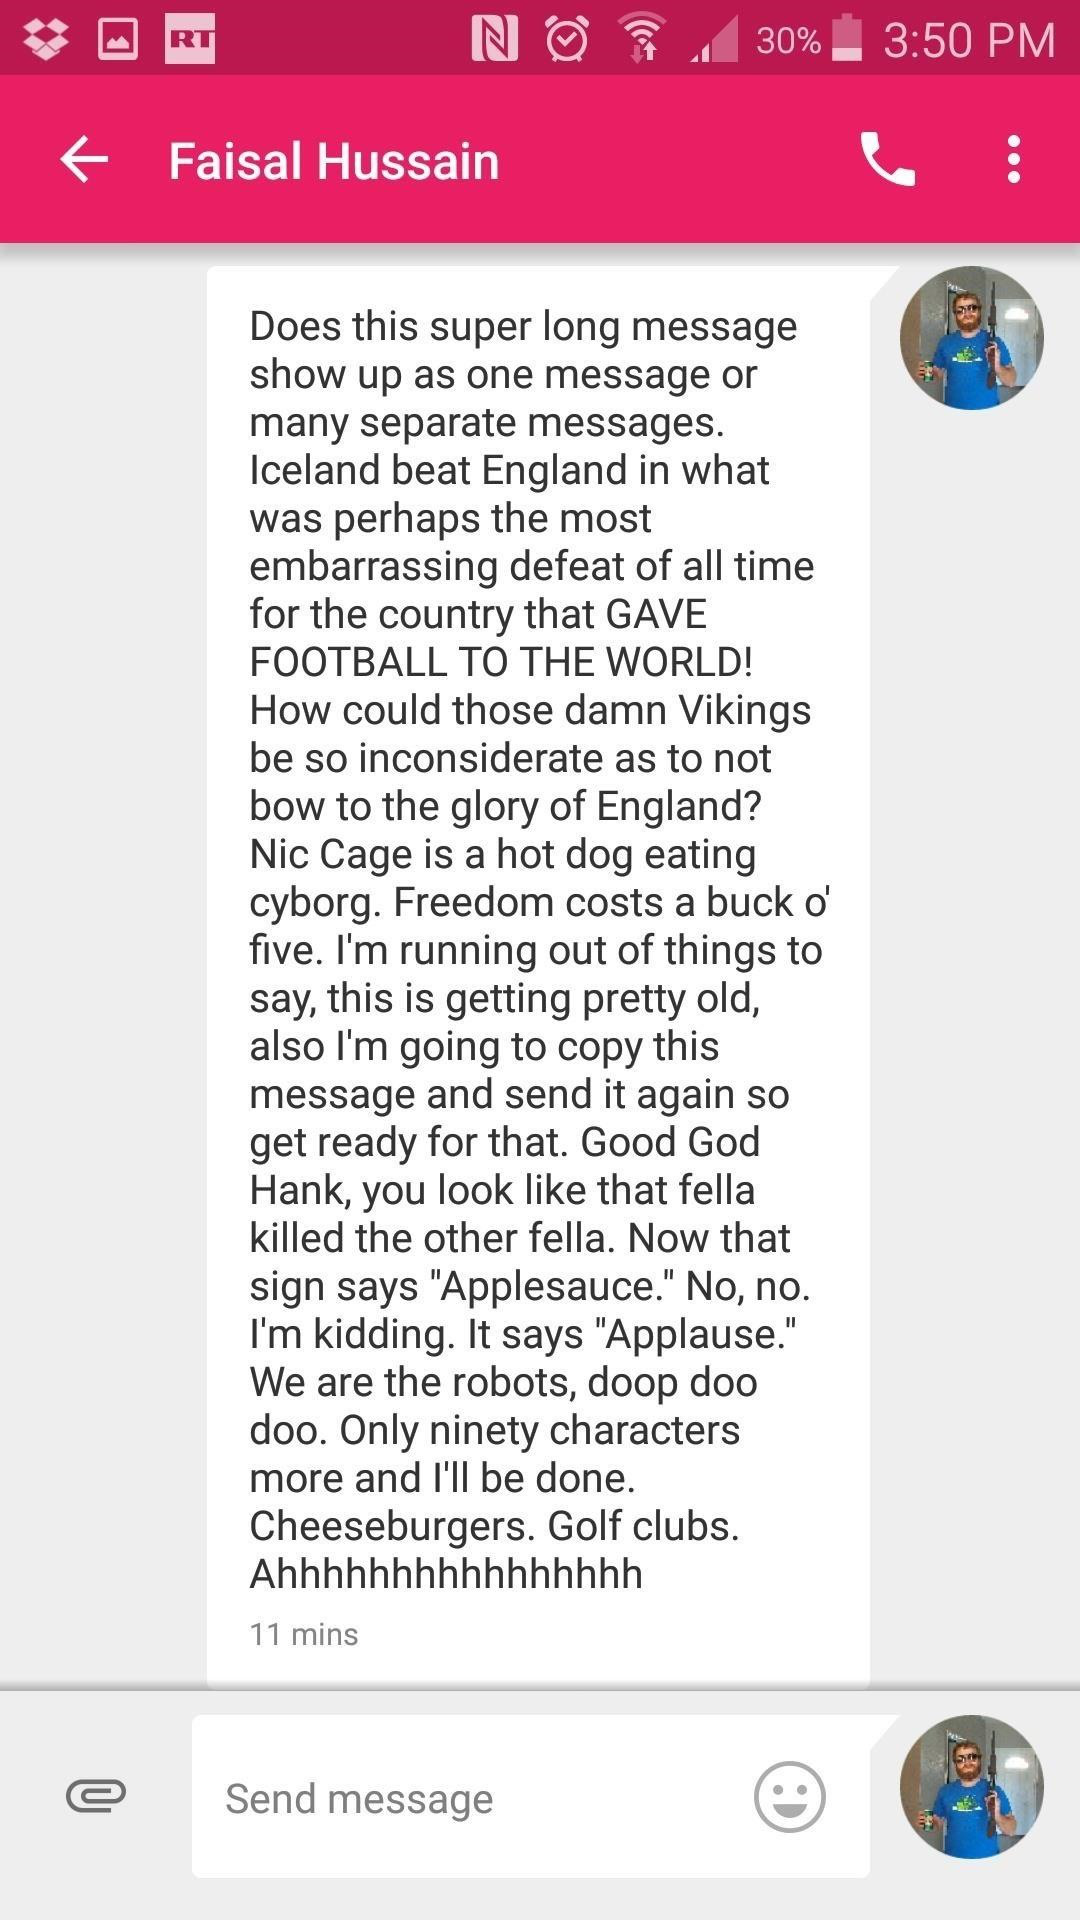

'&) & N © F 14 30%M 3:50 PM\n\n< Faisal Hussain\n\n \n\nDoes this super long message\nshow up as one message or\nmany separate messages.\nIceland beat England in what\nwas perhaps the most\nembarrassing defeat of all time\nfor the country that GAVE\nFOOTBALL TO THE WORLD!\nHow could those damn Vikings\nbe so inconsiderate as to not\nbow to the glory of England?\nNic Cage is a hot dog eating\ncyborg. Freedom costs a buck o\'\nfive. I\'m running out of things to\nsay, this is getting pretty old,\nalso I\'m going to copy this\nmessage and send it again so\nget ready for that. Good God\nHank, you look like that fella\nkilled the other fella. Now that\nsign says "Applesauce." No, no.\nI\'m kidding. It says "Applause."\nWe are the robots, doop doo\ndoo. Only ninety characters\nmore and I\'ll be done.\nCheeseburgers. Golf clubs.\nAhhhhhhhhhhhhhhhh\n\n11 mins\n\n© Send message e 7 (ge\n\n \n\x0c'

In [ ]:
img = Image.open('testimage.jpg')
img.show()
sample = tess.image_to_string(img)
sample

-------------------

## Text Summarization Pipelines


In [ ]:
sample_text = sample

# We'll collect the generated summaries of each model in a dictionary
summaries = {}

### Summarization Baseline


In [ ]:
def baseline_summary_three_sent(text):
    return "\n".join(sent_tokenize(text)[:3])

In [ ]:
summaries['baseline'] = baseline_summary_three_sent(sample_text)

summaries['baseline']

'&) & N © F 14 30%M 3:50 PM\n\n< Faisal Hussain\n\n \n\nDoes this super long message\nshow up as one message or\nmany separate messages.\nIceland beat England in what\nwas perhaps the most\nembarrassing defeat of all time\nfor the country that GAVE\nFOOTBALL TO THE WORLD!\nHow could those damn Vikings\nbe so inconsiderate as to not\nbow to the glory of England?'

# huggingface pipeline

The pipelines are a great and easy way to use models for inference.

Stating ”summarization”: will return a `SummarizationPipeline`

”text-generation”: will return a TextGenerationPipeline

-----------------------

# GPT-2

We can use GPT-2 it to generate summaries by simply appending “TL;DR” at the end of the input text.

The expression “TL;DR” (too long; didn’t read) is often used on platforms like
Reddit to indicate a short version of a long post. We will start our
summarization experiment by re-creating the procedure of the original paper
with the pipeline() function from Transformers

We create a text generation pipeline and load the GPT-2 model:

In [ ]:
from transformers import pipeline, set_seed

set_seed(42)

pipe = pipeline('text-generation', model = 'gpt2-medium' )

gpt2_query = sample_text + "\nTL;DR:\n"

pipe_out = pipe(gpt2_query, max_length = 512, clean_up_tokenization_spaces = True)

Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
pipe_out

[{'generated_text': '&) & N © F 14 30%M 3:50 PM\n\n< Faisal Hussain\n\n \n\nDoes this super long message\nshow up as one message or\nmany separate messages.\nIceland beat England in what\nwas perhaps the most\nembarrassing defeat of all time\nfor the country that GAVE\nFOOTBALL TO THE WORLD!\nHow could those damn Vikings\nbe so inconsiderate as to not\nbow to the glory of England?\nNic Cage is a hot dog eating\ncyborg. Freedom costs a buck o\'\nfive. I\'m running out of things to\nsay, this is getting pretty old,\nalso I\'m going to copy this\nmessage and send it again so\nget ready for that. Good God\nHank, you look like that fella\nkilled the other fella. Now that\nsign says "Applesauce." No, no.\nI\'m kidding. It says "Applause."\nWe are the robots, doop doo\ndoo. Only ninety characters\nmore and I\'ll be done.\nCheeseburgers. Golf clubs.\nAhhhhhhhhhhhhhhhh\n\n11 mins\n\n© Send message e 7 (ge\n\n \n\x0c\nTL;DR:\nSWEET MESS __________________________________________________\nThe fir

In [ ]:
pipe_out[0]["generated_text"][len(gpt2_query) :]

'SWEET MESS __________________________________________________\nThe first two messages posted\na month ago were from our awesome\ncrew at RUSH. I think that meant\nthey actually enjoyed the video from\nwhich they posted.\nThey wanted to help make fun posts, this\ngives them a chance. Thank\n\nme afterwards.\n\nI think that will help them build a better video game\n\nto be sure to put as much effort as possible\n\ninto it.\n\nThere is a lot to discuss over at this\n\nchat, but I would like to touch on a few\n\nthings here. First off, the message is to be used with\n\nsome respect at this point. We have an important\n\nmission here. If your message starts out like: "\n\nSWEET MESS __________________________________________________\n\n...\n\nhey\n\nI got a few points to be\n\nattempted\n\nI am a\n\nSWEET M departee\n\nHey you\n\nI wanna hear\n\na lot of good ole\n\ncool\n\ngreat games\n\nThis one from\n\nNigeria\n\n(not'

In [ ]:
summaries['gpt2'] = "\n".join(sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :]))

# T5

T5 (Text-To-Text Transfer Transformer) is a transformer model that is trained in an end-to-end manner with text as input and modified text as output, in contrast to BERT-style models that can only output either a class label or a span of the input. This text-to-text formatting makes the T5 model fit for multiple NLP tasks like Summarization, Question-Answering, Machine Translation, and Classification problems.

How T5 is different from BERT?
Both T5 and BERT are trained with MLM (Masked Language Model) approach.

What is MLM?

The MLM is a fill-in-the-blank task, where the model masks part of the input text and tries to predict what that masked word should be.

Example:

“I like to eat peanut butter and <MASK> sandwiches,”
“I like to eat peanut butter and jelly sandwiches,”


The only difference is that T5 replaces multiple consecutive tokens with the single Mask Keyword, unlike, BERT which uses Mask token for each word. This illustration is shown below.


### T5 expects a prefix before the input text to understand the task given by the user. For example,

- “summarize:” for the summarization,
- “cola sentence:” for the classification,
- “translate English to Spanish:” for the machine translation, etc.,


--------------


But here in this case, I can directly load T5 for summarization with the pipeline() function, which also takes care of formatting the inputs in the text-to-text format so we don’t
need to prepend them with "summarize":


In [ ]:
pipe = pipeline('summarization', model = 't5-small' )

pipe_out = pipe(sample_text)

In [ ]:
pipe_out

[{'summary_text': 'Iceland beat England in what was perhaps the most embarrassing defeat of all time for the country that GAVE FOOTBALL TO THE WORLD! I\'m running out of things to say, this is getting pretty old . it says "Applause"'}]

In [ ]:
summaries['t5'] = 'n'.join(sent_tokenize(pipe_out[0]['summary_text']))

# BART

BART is a denoising autoencoder for pretraining sequence-to-sequence models. It is trained by (1) corrupting text with an arbitrary noising function, and (2) learning a model to reconstruct the original text. It uses a standard Transformer-based neural machine translation architecture.

That means, It uses a standard seq2seq/NMT architecture with a bidirectional encoder (like BERT) and a left-to-right decoder (like GPT). This means the encoder's attention mask is fully visible, like BERT, and the decoder's attention mask is causal, like GPT2.


This means that a fine-tuned BART model can take a text sequence (for example, English) as input and produce a different text sequence at the output (for example, French).

This type of model is relevant for machine translation, question-answering , text summarization, or sequence classification (categorizing input text sentences or tokens).

Another task is sentence entailment which, given two or more sentences, evaluates whether the sentences are logical extensions or are logically related to a given statement.

In [ ]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn")
pipe_out = pipe(sample_text)


In [ ]:
pipe_out

[{'summary_text': 'Iceland beat England in what was perhaps the most embarrassing defeat of all time. Faisal Hussain sent the message after England lost to Iceland in the World Cup. The message was sent at 3:50 p.m. (GMT-8:50 a.m.)'}]

In [ ]:
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

In [ ]:
summaries["bart"]

'Iceland beat England in what was perhaps the most embarrassing defeat of all time.\nFaisal Hussain sent the message after England lost to Iceland in the World Cup.\nThe message was sent at 3:50 p.m. (GMT-8:50 a.m.)'

# PEGASUS

The PEGASUS model’s pre-training task is very similar to summarization, i.e. important sentences are removed and masked from an input document and are later generated together as one output sequence from the remaining sentences, which is fairly similar to a summary. In PEGASUS, several whole sentences are removed from documents during pre-training, and the model is tasked with recovering them. The Input for such pre-training is a document with missing sentences, while the output consists of the missing sentences being concatenated together. The advantage of this self-supervision is that you can create as many examples as there are documents without any human intervention, which often becomes a bottleneck problem in purely supervised systems.

In [ ]:
pipe = pipeline('summarization', model="google/pegasus-cnn_dailymail"  )

pipe_out = pipe(sample_text)

In [ ]:
pipe_out

[{'summary_text': "Iceland beat England in what was perhaps the most embarrassing defeat of all time for the country that GAVE FOOTBALL TO THE WORLD!<n>How could those damn Vikings be so inconsiderate as to not bow to the glory of England?<n>I'm running out of things to say, this is getting pretty old, also I'm going to copy this message and send it again so get ready for that."}]

In [ ]:
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

In [ ]:
## Comparing Different Summaries

In [ ]:
print("GROUND TRUTH")

print(sample)


for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])
    print()

GROUND TRUTH
&) & N © F 14 30%M 3:50 PM

< Faisal Hussain

 

Does this super long message
show up as one message or
many separate messages.
Iceland beat England in what
was perhaps the most
embarrassing defeat of all time
for the country that GAVE
FOOTBALL TO THE WORLD!
How could those damn Vikings
be so inconsiderate as to not
bow to the glory of England?
Nic Cage is a hot dog eating
cyborg. Freedom costs a buck o'
five. I'm running out of things to
say, this is getting pretty old,
also I'm going to copy this
message and send it again so
get ready for that. Good God
Hank, you look like that fella
killed the other fella. Now that
sign says "Applesauce." No, no.
I'm kidding. It says "Applause."
We are the robots, doop doo
doo. Only ninety characters
more and I'll be done.
Cheeseburgers. Golf clubs.
Ahhhhhhhhhhhhhhhh

11 mins

© Send message e 7 (ge

 

BASELINE
&) & N © F 14 30%M 3:50 PM

< Faisal Hussain

 

Does this super long message
show up as one message or
many separate message

# ROUGE

# ROUGE vs BLEU

Bleu measures precision: how much the words (and/or n-grams) in the machine generated summaries appeared in the human reference summaries.

Rouge measures recall: how much the words (and/or n-grams) in the human reference summaries appeared in the machine generated summaries.

### Interpretation of Rouge Score

ROUGE-n recall=40% means that 40% of the n-grams in the reference summary are also present in the generated summary.

--------

The ROUGE score was specifically developed for applications like
summarization where high recall is more important than just precision.5

The approach is very similar to the BLEU score in that we look at different n-grams
and compare their occurrences in the generated text and the reference texts.


The difference is that with ROUGE we check how many n-grams in the
reference text also occur in the generated text. For BLEU we looked at how
many n-grams in the generated text appear in the reference

In [ ]:
rouge_metric = load_metric('rouge')

<ipython-input-28-90542a62301a>:1: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  rouge_metric = load_metric('rouge')


## ROUGE-N

With ROUGE-N, the N represents the n-gram that we are using. For ROUGE-1 we would be measuring the match-rate of unigrams between our model output and reference.

ROUGE-2 and ROUGE-3 would use bigrams and trigrams respectively.


## ROUGE-L

ROUGE-L measures the longest common subsequence (LCS) between our model output and reference. All this means is that we count the longest sequence of tokens that is shared between both:


In the HF Datasets implementation, two variations of ROUGE are
calculated: one calculates the score per sentence and averages it for the
summaries (ROUGE-L), and the other calculates it directly over the whole
summary (ROUGE-Lsum).


In [ ]:
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

reference = "Iceland beat England in football is an embarrasing defeat. Faisal is getting old, so he's sending messages to the other. Meanwhile, the sign says Applesauce instead of Applesauce."

records = []

for model_name in summaries:
    rouge_metric.add(prediction = summaries[model_name], reference = reference )
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )
    print('rouge_dict ', rouge_dict )
    records.append(rouge_dict)

pd.DataFrame.from_records(records, index = summaries.keys() )

rouge_dict  {'rouge1': 0.27956989247311825, 'rouge2': 0.0879120879120879, 'rougeL': 0.1935483870967742, 'rougeLsum': 0.2580645161290323}
rouge_dict  {'rouge1': 0.0893854748603352, 'rouge2': 0.0, 'rougeL': 0.0446927374301676, 'rougeLsum': 0.0782122905027933}
rouge_dict  {'rouge1': 0.4117647058823529, 'rouge2': 0.15151515151515152, 'rougeL': 0.2647058823529412, 'rougeLsum': 0.2647058823529412}
rouge_dict  {'rouge1': 0.2816901408450704, 'rouge2': 0.08695652173913043, 'rougeL': 0.2535211267605634, 'rougeLsum': 0.19718309859154928}
rouge_dict  {'rouge1': 0.2772277227722772, 'rouge2': 0.10101010101010102, 'rougeL': 0.1782178217821782, 'rougeLsum': 0.1782178217821782}


,rouge1,rouge2,rougeL,rougeLsum
baseline,0.279570,0.087912,0.193548,0.258065
gpt2,0.089385,0.000000,0.044693,0.078212
t5,0.411765,0.151515,0.264706,0.264706
bart,0.281690,0.086957,0.253521,0.197183
pegasus,0.277228,0.101010,0.178218,0.178218


# Evaluationg on the TEST set of the CNN/DailyMail Dataset

In [ ]:
def calculate_metric_on_baseline_test_ds(dataset, metric, column_text = 'article', column_summary = 'highlights' ):
    """
    This function calculates a specified metric on a baseline test dataset for a Natural Language Processing (NLP) task.
    It assumes the task is a text summarization task, where the goal is to generate a summary (e.g., highlights) from a text (e.g., article).

    Parameters:
    dataset (pandas.DataFrame): The test dataset. It should contain a column for the text and a column for the true summary.
    metric (datasets.Metric): The metric to calculate. This should be a metric object from the Hugging Face datasets library.
    column_text (str, optional): The name of the column in the dataset that contains the text. Defaults to 'article'.
    column_summary (str, optional): The name of the column in the dataset that contains the true summary. Defaults to 'highlights'.

    Returns:
    score (float): The calculated score of the metric on the test dataset.
    """
    summaries = [baseline_summary_three_sent(text) for text in dataset[column_text] ]

    metric.add_batch(predictions = summaries, references = dataset[column_summary] )

    score = metric.compute()
    return score

In [ ]:
test_sampled = dataset['train'].shuffle(seed = 42).select(range(1000))

score = calculate_metric_on_baseline_test_ds(test_sampled, rouge_metric )

rouge_dict = dict((rn, score[rn].mid.fmeasure ) for rn in rouge_names )

pd.DataFrame.from_dict(rouge_dict, orient = 'index' , columns = ['baseline'] ).T

,rouge1,rouge2,rougeL,rougeLsum
baseline,0.253995,0.100642,0.165754,0.231571


## Strategy to calculate the ROUGE Metric on test dataset for the other Models

In [ ]:
from tqdm import tqdm
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

def generate_batch_sized_chunks(list_of_elements, batch_size):
    """split the dataset into smaller batches that we can process simultaneously
    Yield successive batch-sized chunks from list_of_elements.

    Generator function to yield successive batch-sized chunks from list_of_elements.

    Parameters:
    list_of_elements (list): List of elements to be divided into chunks.
    batch_size (int): The size of each chunk.

    Yields:
    list: Batch-sized chunk from list_of_elements.

    """
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def calculate_metric_on_test_ds(dataset, metric, model, tokenizer,
                               batch_size=16, device=device,
                               column_text="article",
                               column_summary="highlights"):
    """
    Function to calculate a specified metric on a test dataset for a Natural Language Processing (NLP) task.
    It assumes the task is a text summarization task, where the goal is to generate a summary from a text.

    Parameters:
    dataset (pandas.DataFrame): The test dataset. It should contain a column for the text and a column for the true summary.
    metric (datasets.Metric): The metric to calculate. This should be a metric object from the Hugging Face datasets library.
    model (transformers.PreTrainedModel): The transformer model to use for text generation.
    tokenizer (transformers.PreTrainedTokenizer): The tokenizer corresponding to the model.
    batch_size (int, optional): The size of the batches to use for processing. Defaults to 16.
    device (str, optional): The device to run the model on. Defaults to the output of torch.cuda.is_available().
    column_text (str, optional): The name of the column in the dataset that contains the text. Defaults to 'article'.
    column_summary (str, optional): The name of the column in the dataset that contains the true summary. Defaults to 'highlights'.

    Returns:
    score (float): The calculated score of the metric on the test dataset.
    """
    article_batches = list(generate_batch_sized_chunks(dataset[column_text], batch_size))
    target_batches = list(generate_batch_sized_chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):

        inputs = tokenizer(article_batch, max_length=1024,  truncation=True,
                        padding="max_length", return_tensors="pt")

        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device),
                         length_penalty=0.8, num_beams=8, max_length=128)
        ''' parameter for length penalty ensures that the model does not generate sequences that are too long. '''

        # Finally, we decode the generated texts,
        # replace the <n> token, and add the decoded texts with the references to the metric.
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True,
                                clean_up_tokenization_spaces=True)
               for s in summaries]

        decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries]


        metric.add_batch(predictions=decoded_summaries, references=target_batch)

    #  Finally compute and return the ROUGE scores.
    score = metric.compute()
    return score

In [ ]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_ckpt = "google/pegasus-cnn_dailymail"

tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

model_pegasus = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)

score = calculate_metric_on_test_ds(test_sampled, rouge_metric,
                                   model_pegasus, tokenizer, batch_size=8)

rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)

# At the end, we compute and return the ROUGE scores.
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|██████████| 125/125 [23:33<00:00, 11.31s/it]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.47519,0.278492,0.373879,0.428834
